# **Question2** #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
data = np.genfromtxt('data.csv', delimiter=',')

In [3]:
# cost and gradient function        
def cost_and_gradient(training_data, b0, b1):
    m = len(training_data)
    x = training_data[:,0]
    y = training_data[:,1]
    h = b0 + b1*x
    cost = (1/(2*m))* sum((h-y)**2)
    grad_theta0 = (1/m)*sum(h-y)
    grad_theta1 = (1/m)*sum((h-y)*x)
    
    result = np.array([cost,grad_theta0,grad_theta1])
    return(result)      
       

In [4]:
# gradient descent function
def gradient_descent(training_data, initial_b0, initial_b1 , alpha, iterations):
    for i in range(iterations):
        result = cost_and_gradient(training_data, initial_b0, initial_b1)
        cost = result[0]
        grad_theta0 = result[1]
        grad_theta1 = result[2]
       
        initial_b0 = initial_b0 - alpha*grad_theta0
        initial_b1 = initial_b1 - alpha*grad_theta1
       
        cost_array[i] = cost
    return (cost,initial_b0,initial_b1)
   # print('cost = ', cost, 'initial_b0 = ', initial_b0, 'initial_b1 = ', initial_b1 )


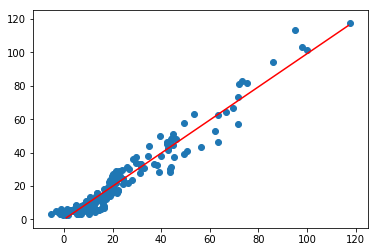

In [5]:
# Part a)
alpha = 0.0001
iterations = 100
xx = np.arange(1,max(data[:,0]),1)
cost_array = np.zeros(iterations)
result = gradient_descent(data,0,0,alpha,iterations)
yy = result[1]+result[2]*xx
plt.plot(xx,yy,'r')
plt.scatter(data[:,0],data[:,1])
plt.show()      


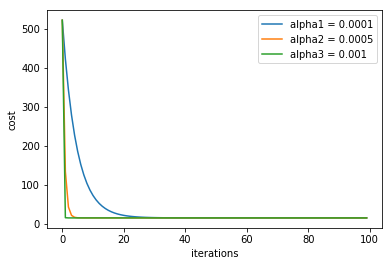

In [6]:
# Part b)
# Plot the cost vs. iterations for learning rates (0.0001, 0.0005, 0.001)
alpha1 = 0.0001
alpha2 = 0.0005
alpha3 = 0.001

it = np.arange(0,iterations,1)
cost_array = np.zeros(iterations)
gradient_descent(data,0,0,alpha1,iterations)
plt.plot(it,cost_array)

gradient_descent(data,0,0,alpha2,iterations)
plt.plot(it,cost_array)

gradient_descent(data,0,0,alpha3,iterations)
plt.plot(it,cost_array)

plt.legend(['alpha1 = 0.0001','alpha2 = 0.0005','alpha3 = 0.001'])
plt.xlabel('iterations')
plt.ylabel('cost')

plt.show()


In [71]:
# Part c) 
# The best learning rate is 0.001 because it converged the fastest

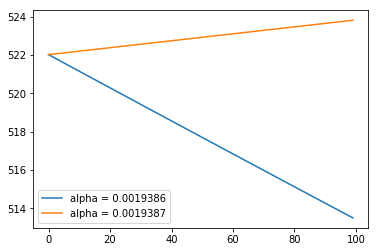

In [7]:
# Part d)
alpha = 0.0019386
gradient_descent(data,0,0,alpha,iterations)
plt.plot(it,cost_array)

alpha = 0.0019387
gradient_descent(data,0,0,alpha,iterations)
plt.plot(it,cost_array)

plt.legend(['alpha = 0.0019386','alpha = 0.0019387'])
plt.show()

In [8]:
# In part c, we see that the learning rate of 0.001 is the fastest to converge the cost function, 
# so I begin by increasing the learning rate to 0.002, and saw that it divereged very quickly. Because of this, 
# I knew that the upper bound of the learning rate was somewhere between 0.001 and 0.002, 
# so I began inreasing in smaller increments to find at which (greatest) point the learning rate diverged 
# betweeen 0.001 and 0.002. In the plot above, we can see that at the learning rate of 0.0019386, 
# the cost function converges (although very slowly) and if you increase the learning rate by 0.0000001, to 0.0019387, 
# the learning rate diverges, as shown in the blue plot. Therefore, the upper bound is around 0.0019386.

In [9]:
# Part e)

# Mini-batch cost and gradient function
def mini_batch_cost_gradient(training_data, b0, b1):
    b = 20
    x = training_data[:,0]
    y = training_data[:,1]
    h = b0 + b1*x
    
    # sum from 1 to batch-1 instead of all samples
    for i in range(0,b):
        sum1 = h[i]-y[i]
        sum2 = (h[i]-y[i])*x[i]
    
    for i in range(0,len(data)):
        cost_sum = (h[i]-y[i])**2
        
    cost = (1/(2*len(data)))* cost_sum
    grad_theta0 = (1/b)*sum1
    grad_theta1 = (1/b)*sum2
    
    result = np.array([cost,grad_theta0,grad_theta1])
    cost_a.append(cost)
    
    return(result)

In [10]:
# Mini-batch gradient descent
def mini_batch_gradient_descent(training_data, initial_b0, initial_b1 , alpha):
    for i in range(0,int(len(training_data)/20)):
        result = mini_batch_cost_gradient(training_data, initial_b0, initial_b1)
        cost = result[0]
        grad_theta0 = result[1]
        grad_theta1 = result[2]
       
        initial_b0 = initial_b0 - alpha*grad_theta0
        initial_b1 = initial_b1 - alpha*grad_theta1
       
       
    return (cost,initial_b0,initial_b1)

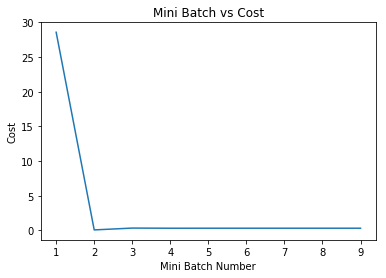

In [11]:
# calculate cost functions using mini-batch gradient descent

alpha = 0.09
initial_b0 = 0
initial_b1 = 0
cost_a = []

mini_batch_gradient_descent(data, initial_b0, initial_b1 , alpha)
xx = np.arange(1,len(cost_a)+1,1)

plt.xlabel('Mini Batch Number')
plt.ylabel('Cost')
plt.title('Mini Batch vs Cost')
plt.plot(xx,cost_a)

In [ ]:
# Part e)
# In the plot above, we can see that the Mini Batch Gradient Descent starts at a much lower cost function value than the
# batch gradient descent. We can see that it converges quickly and remains low after the first batch number.

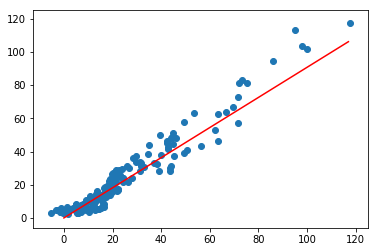

In [15]:
xx = np.arange(0,max(data[:,0]),1)

result = mini_batch_gradient_descent(data,0,0,alpha)
yy = result[1]+result[2]*xx
plt.plot(xx,yy,'r')
plt.scatter(data[:,0],data[:,1])
plt.show()